In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Merged DataFrame with Computed Ratio:
  Country  Year  Cell Phones  Population  \
0     USA  2020    400000000   330000000   
1   India  2020    800000000  1380000000   
2  Brazil  2020    200000000   211000000   

   Cell Phones (per 100 people) Computed  
0                             121.212121  
1                              57.971014  
2                              94.786730  

Final DataFrame with Comparison:
  Country  Year  Cell Phones  Population  \
0     USA  2020    400000000   330000000   
1   India  2020    800000000  1380000000   
2  Brazil  2020    200000000   211000000   

   Cell Phones (per 100 people) Computed  Cell Phones (per 100 people)  \
0                             121.212121                         121.2   
1                              57.971014                          57.9   
2                              94.786730                          94.8   

   Ratio Matches  
0           True  
1           True  
2           True  


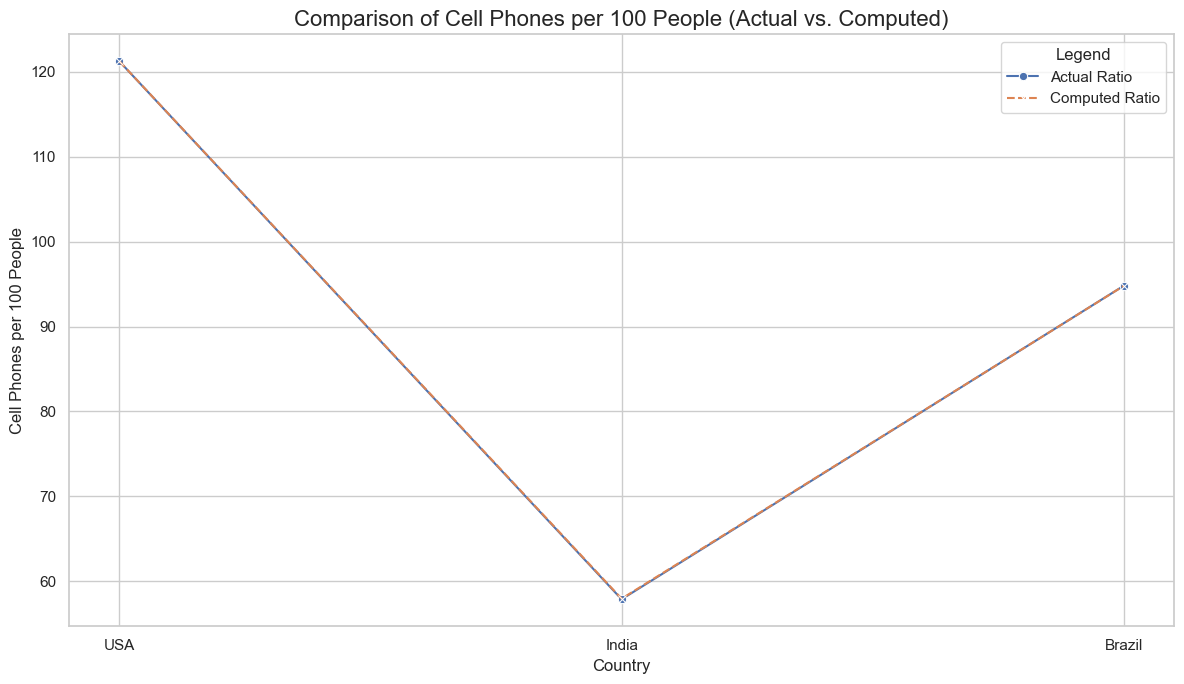

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cell_phones_data = {
    'Country': ['USA', 'India', 'Brazil'],
    'Year': [2020, 2020, 2020],
    'Cell Phones': [400000000, 800000000, 200000000]
}
population_data = {
    'Country': ['USA', 'India', 'Brazil'],
    'Year': [2020, 2020, 2020],
    'Population': [330000000, 1380000000, 211000000]
}
cell_phones_df = pd.DataFrame(cell_phones_data)
population_df = pd.DataFrame(population_data)
merged_df = pd.merge(cell_phones_df, population_df, on=['Country', 'Year'])
merged_df['Cell Phones (per 100 people) Computed'] = (merged_df['Cell Phones'] / merged_df['Population']) * 100

print("\nMerged DataFrame with Computed Ratio:")
print(merged_df)
reference_data = {
    'Country': ['USA', 'India', 'Brazil'],
    'Year': [2020, 2020, 2020],
    'Cell Phones (per 100 people)': [121.2, 57.9, 94.8]
}
reference_df = pd.DataFrame(reference_data)
final_df = pd.merge(merged_df, reference_df, on=['Country', 'Year'])
final_df['Ratio Matches'] = np.isclose(
    final_df['Cell Phones (per 100 people) Computed'],
    final_df['Cell Phones (per 100 people)'],
    atol=0.1
)
print("\nFinal DataFrame with Comparison:")
print(final_df)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.lineplot(x='Country', y='Cell Phones (per 100 people)', data=final_df, marker='o', label='Actual Ratio')
sns.lineplot(x='Country', y='Cell Phones (per 100 people) Computed', data=final_df, marker='x', linestyle='--', label='Computed Ratio')
plt.title('Comparison of Cell Phones per 100 People (Actual vs. Computed)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Cell Phones per 100 People', fontsize=12)
plt.legend(title='Legend')
plt.grid(True)
plt.tight_layout()
plt.show()
